In [1]:
import urllib2
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import pylab as pl
%matplotlib inline
plt.rcParams['figure.figsize'] = (13,8)
import random as rand
from collections import Counter
from pandas import DataFrame, read_csv
import pandas as pd
from IPython.display import display
import geoplotlib
from geoplotlib.utils import BoundingBox
from geoplotlib.colors import ColorMap
import pylab as pl
from sklearn import neighbors, datasets, linear_model
from matplotlib.colors import ListedColormap
from operator import itemgetter
import re
from __future__ import division
from mpl_toolkits.mplot3d import Axes3D

In [2]:
path = "C:/Users/Luisa HP/Google Drive/DTU/02806 Social Data Analysis/Final Project/"
filename = "mydata.csv"
# Read CSV data with Pandas formatting
mydata = pd.read_csv(path+filename)

C:\Users\Luisa HP\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8,18,19,21,39,44,45,46,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
mydata[0:2]

Unnamed: 0  Unique Key            Created Date             Closed Date  \
0         471    35525651  02/18/2017 09:17:00 AM  02/21/2017 12:00:00 PM   
1        7515    35172585  01/05/2017 08:21:00 AM  01/06/2017 12:00:00 PM   

  Agency      Agency Name Complaint Type                         Descriptor  \
0   DSNY        A - Bronx           Snow             E9 Snow / Icy Sidewalk   
1   DSNY  BCC - Manhattan           Snow  15S Re-Plow/Spread/Ice-Snow Cond.   

  Location Type  Incident Zip   ...    Bridge Highway Name  \
0      Sidewalk           NaN   ...                    NaN   
1        Street           NaN   ...                    NaN   

  Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name  \
0                      NaN       NaN                    NaN             NaN   
1                      NaN       NaN                    NaN             NaN   

  Ferry Direction Ferry Terminal Name Latitude Longitude Location  
0             NaN                 NaN      NaN       NaN      NaN  
1             NaN                 NaN      NaN       NaN      NaN  

[2 rows x 54 columns]

In [4]:
mydata.dtypes

Unnamed: 0                          int64
Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date    

In [5]:
len(mydata.index)

3806743

In [24]:
#Dates need to be tranformed to date format
mydata['crea_dates'] = pd.to_datetime(mydata['Created Date'])

In [25]:
mydata.to_csv("C:/Users/Luisa HP/Google Drive/DTU/02806 Social Data Analysis/Final Project/mydata_withdates.csv")

In [28]:
print "Min date:", mydata["crea_dates"].min()
print "Max date:", mydata["crea_dates"].max()

Min date: 2010-01-01 00:03:46
Max date: 2017-03-27 01:37:07


In [23]:
missingGeo = mydata[mydata['Latitude'].isnull()]
print "Missing geodata", len(missingGeo)

missingDate = mydata[mydata['Created Date'].isnull()]
print "Missing date", len(missingDate)

missingDesc = mydata[mydata['Descriptor'].isnull()]
print "Missing descriptor", len(missingDesc)

missingType = mydata[mydata['Complaint Type'].isnull()]
print "Missing type", len(missingType)

Missing geodata 28462
Missing date 0
Missing descriptor 31092
Missing type 0


In [29]:
urine = mydata[(mydata["Complaint Type"] == "Urinating in Public")]

In [42]:
# urine.dtypes
# urine[0:2]
# urine.Year.max()

2016

In [160]:
mydata["Year"] = mydata['crea_dates'].dt.year
mydata["Weekday"] = mydata['crea_dates'].dt.weekday
mydata["Hour"] = mydata['crea_dates'].dt.hour
mydata["Weekday_name"] = mydata['crea_dates'].dt.weekday_name

In [111]:
mydata = mydata.assign(
    TimeOfDay=pd.cut(
        mydata.Hour,
        [-1, 5, 11, 17, 24],
        labels=['Night', 'Morning', 'Afternoon', 'Evening']))

In [114]:
# pd.crosstab(mydata.Hour,mydata.TimeOfDay)

In [46]:
mydata = mydata[(mydata["Year"] < 2017)]

In [15]:
#Some lat+long data is missing, so we'll remove these observations
mydata = mydata[mydata['Latitude'].notnull()]

In [161]:
party = mydata[(mydata.Descriptor == "Loud Music/Party")]
urine = mydata[(mydata["Complaint Type"] == "Urinating in Public")]
rodent = mydata[(mydata["Complaint Type"] == "Rodent")]
graffiti = mydata[(mydata["Complaint Type"] == "Graffiti")]
air = mydata[(mydata["Complaint Type"] == "Air Quality")]

In [193]:
party_year_dist = pd.DataFrame(party.groupby('Year').size())
rodent_year_dist = pd.DataFrame(rodent.groupby('Year').size())
graffiti_year_dist = pd.DataFrame(graffiti.groupby('Year').size())
air_year_dist = pd.DataFrame(air.groupby('Year').size())
urine_year_dist = pd.DataFrame(urine.groupby('Year').size())

In [195]:
# party_year_dist

In [184]:
party_weekday_dist = pd.DataFrame(party.groupby('Weekday').size())
rodent_weekday_dist = pd.DataFrame(rodent.groupby('Weekday').size())
graffiti_weekday_dist = pd.DataFrame(graffiti.groupby('Weekday').size())
air_weekday_dist = pd.DataFrame(air.groupby('Weekday').size())
urine_weekday_dist = pd.DataFrame(urine.groupby('Weekday').size())

In [197]:
# party_weekday_dist

In [198]:
party_timeofday_dist = pd.DataFrame(party.groupby('TimeOfDay').size())
rodent_timeofday_dist = pd.DataFrame(rodent.groupby('TimeOfDay').size())
graffiti_timeofday_dist = pd.DataFrame(graffiti.groupby('TimeOfDay').size())
air_timeofday_dist = pd.DataFrame(air.groupby('TimeOfDay').size())
urine_timeofday_dist = pd.DataFrame(urine.groupby('TimeOfDay').size())

In [204]:
rodent_timeofday_dist

0
TimeOfDay        
Night      160439
Morning      4393
Afternoon    5339
Evening      2449

In [180]:
# fig, ax = plt.subplots()
# party['Weekday_name'].value_counts().plot(ax=ax, kind='bar')

In [174]:
# weekdays = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
# mapping = {Weekday: i for i, Weekday in enumerate(weekdays)}
# key = urine['Weekday'].map(mapping)

In [176]:
# print key

In [181]:
# order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
# urine.set_index('Weekday_name').ix[order].value_counts().plot(kind='bar')

In [182]:
# fig, ax = plt.subplots()
# party['Weekday_name'].value_counts().plot(ax=ax, kind='bar')

In [22]:
#Map of Loud Music/Party

# List of latitudes
list_of_lat = party["Latitude"]
# List of longitudes
list_of_long = party["Longitude"]
# geoplotlib format
geo_data_for_plotting = {"lat": list_of_lat,
                         "lon": list_of_long}
# To get a map only of NY
bbox = BoundingBox(north=max(list_of_lat), west=min(list_of_long), south=min(list_of_lat), east=max(list_of_long))
geoplotlib.set_bbox(bbox)
# geoplotlib.tiles_provider('watercolor')
geoplotlib.kde(geo_data_for_plotting, bw=5, cmap='jet', cut_below=1e-4)
# Save fig in order to represent it later
# geoplotlib.savefig('party.png')
# img_party=mpimg.imread('party.png')
geoplotlib.inline()

('smallest non-zero count', 8.381255378908067e-06)
('max count:', 87.314754507771084)


In [23]:
#Map of Rondents

# List of latitudes
list_of_lat = rodent["Latitude"]
# List of longitudes
list_of_long = rodent["Longitude"]
# geoplotlib format
geo_data_for_plotting = {"lat": list_of_lat,
                         "lon": list_of_long}
# To get a map only of NY
bbox = BoundingBox(north=max(list_of_lat), west=min(list_of_long), south=min(list_of_lat), east=max(list_of_long))
geoplotlib.set_bbox(bbox)
# geoplotlib.tiles_provider('watercolor')
geoplotlib.kde(geo_data_for_plotting, bw=5, cmap='jet', cut_below=1e-4)
# Save fig in order to represent it later
# geoplotlib.savefig('party.png')
# img_party=mpimg.imread('party.png')
geoplotlib.inline()

('smallest non-zero count', 1.0165006656003023e-06)
('max count:', 7.6096698796051321)


In [24]:
#Map of Graffiti

# List of latitudes
list_of_lat = graffiti["Latitude"]
# List of longitudes
list_of_long = graffiti["Longitude"]
# geoplotlib format
geo_data_for_plotting = {"lat": list_of_lat,
                         "lon": list_of_long}
# To get a map only of NY
bbox = BoundingBox(north=max(list_of_lat), west=min(list_of_long), south=min(list_of_lat), east=max(list_of_long))
geoplotlib.set_bbox(bbox)
# geoplotlib.tiles_provider('watercolor')
geoplotlib.kde(geo_data_for_plotting, bw=5, cmap='jet', cut_below=1e-4)
# Save fig in order to represent it later
# geoplotlib.savefig('party.png')
# img_party=mpimg.imread('party.png')
geoplotlib.inline()

('smallest non-zero count', 3.6490060938010199e-08)
('max count:', 15.526439128430981)


In [25]:
#Map of Air

# List of latitudes
list_of_lat = air["Latitude"]
# List of longitudes
list_of_long = air["Longitude"]
# geoplotlib format
geo_data_for_plotting = {"lat": list_of_lat,
                         "lon": list_of_long}
# To get a map only of NY
bbox = BoundingBox(north=max(list_of_lat), west=min(list_of_long), south=min(list_of_lat), east=max(list_of_long))
geoplotlib.set_bbox(bbox)
# geoplotlib.tiles_provider('watercolor')
geoplotlib.kde(geo_data_for_plotting, bw=5, cmap='jet', cut_below=1e-4)
# Save fig in order to represent it later
# geoplotlib.savefig('party.png')
# img_party=mpimg.imread('party.png')
geoplotlib.inline()

('smallest non-zero count', 4.2292940046479448e-06)
('max count:', 3.986869088980324)


In [26]:
#Map of Urine

# List of latitudes
list_of_lat = urine["Latitude"]
# List of longitudes
list_of_long = urine["Longitude"]
# geoplotlib format
geo_data_for_plotting = {"lat": list_of_lat,
                         "lon": list_of_long}
# To get a map only of NY
bbox = BoundingBox(north=max(list_of_lat), west=min(list_of_long), south=min(list_of_lat), east=max(list_of_long))
geoplotlib.set_bbox(bbox)
# geoplotlib.tiles_provider('watercolor')
geoplotlib.kde(geo_data_for_plotting, bw=5, cmap='jet', cut_below=1e-4)
# Save fig in order to represent it later
# geoplotlib.savefig('party.png')
# img_party=mpimg.imread('party.png')
geoplotlib.inline()

('smallest non-zero count', 1.9261052803978676e-07)
('max count:', 0.49338207542983525)


In [132]:
party["Latitude"].isnull().sum()

2276

In [138]:

# List of crimes latitudes
list_of_lat = f_party["Latitude"]
# List of crimes longitudes
list_of_long = f_party["Longitude"]
# geoplotlib format
geo_data_for_plotting = {"lat": list_of_lat,
                         "lon": list_of_long}
# To get a map only of SF
bbox = BoundingBox(north=max(list_of_lat), west=min(list_of_long), south=min(list_of_lat), east=max(list_of_long))
geoplotlib.set_bbox(bbox)
geoplotlib.kde(geo_data_for_plotting, bw=5, cmap='jet', cut_below=1e-4)
geoplotlib.inline()

('smallest non-zero count', 6.2750200101807206e-07)
('max count:', 20.976956858569874)


In [144]:
urine.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

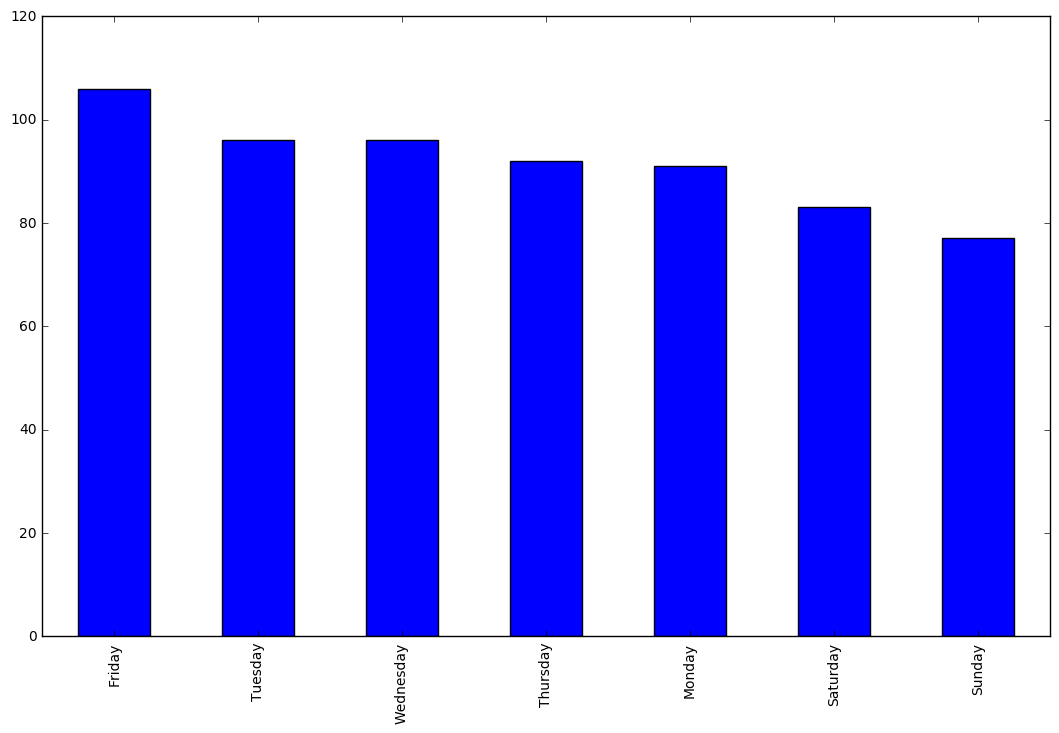

In [152]:
fig, ax = plt.subplots()
urine['day_of_week'].value_counts().plot(ax=ax, kind='bar')

In [158]:
party[0:2]

Unique Key            Created Date             Closed Date Agency  \
844     29622130  01/03/2015 01:23:15 AM  01/03/2015 02:44:09 AM   NYPD   
1029    29652472  01/07/2015 10:53:22 PM  01/07/2015 11:07:06 PM   NYPD   

                          Agency Name           Complaint Type  \
844   New York City Police Department  Noise - Street/Sidewalk   
1029  New York City Police Department  Noise - Street/Sidewalk   

            Descriptor    Location Type Incident Zip  \
844   Loud Music/Party  Street/Sidewalk        10032   
1029  Loud Music/Party  Street/Sidewalk        10030   

                          Incident Address     ...      Garage Lot Name  \
844                      WEST 165TH STREET     ...                  NaN   
1029  ADAM CLAYTON POWELL JUNIOR BOULEVARD     ...                  NaN   

     Ferry Direction Ferry Terminal Name   Latitude  Longitude  \
844              NaN                 NaN  40.840214 -73.943071   
1029             NaN                 NaN  40.817501 -73.941989   

                                     Location    HDP my_dates day_of_week  \
844     (40.8402137710414, -73.9430714320721)  False      NaT         NaN   
1029  (40.81750071826135, -73.94198895149256)  False      NaT         NaN   

     #day_of_week  
844           NaN  
1029          NaN  

[2 rows x 57 columns]

In [27]:
# fig, ax = plt.subplots()
# party['day_of_week'].value_counts().plot(ax=ax, kind='bar')

In [38]:
urine['my_close_dates'] = pd.to_datetime(urine['Closed Date'])

C:\Users\Luisa HP\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [41]:
urine[0:2]

Unique Key            Created Date             Closed Date Agency  \
27716    31464305  09/04/2015 08:24:09 PM  09/04/2015 10:06:53 PM   NYPD   
27717    31464306  09/04/2015 07:30:32 PM  09/05/2015 12:04:03 AM   NYPD   

                           Agency Name       Complaint Type Descriptor  \
27716  New York City Police Department  Urinating in Public        NaN   
27717  New York City Police Department  Urinating in Public        NaN   

         Location Type Incident Zip    Incident Address   ...     \
27716  Street/Sidewalk        10027                 NaN   ...      
27717  Street/Sidewalk        11236  969 EAST 84 STREET   ...      

      Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  \
27716             NaN             NaN                 NaN  40.807039   
27717             NaN             NaN                 NaN  40.636348   

       Longitude                                 Location       my_crea_dates  \
27716 -73.949739  (40.80703873213202, -73.94973912672957) 2015-09-04 20:24:09   
27717 -73.909190   (40.63634755486053, -73.9091896700111) 2015-09-04 19:30:32   

      crea_day_of_week      my_close_dates    Delta  
27716           Friday 2015-09-04 22:06:53 01:42:44  
27717           Friday 2015-09-05 00:04:03 04:33:31  

[2 rows x 57 columns]

In [40]:
urine["Delta"] = urine["my_close_dates"]-urine["my_crea_dates"]

C:\Users\Luisa HP\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
urine["Delta"].max

<bound method Series.max of 27716     0 days 01:42:44
27717     0 days 04:33:31
28276     0 days 01:17:39
30292     0 days 00:48:19
31066     0 days 02:49:00
31802     0 days 11:12:16
32620     0 days 00:58:05
32625     0 days 02:24:26
34825     0 days 02:03:36
36745     0 days 02:32:46
37270     0 days 05:04:40
37388     0 days 03:42:30
39816     0 days 01:36:43
42331     0 days 10:49:56
43335     0 days 05:37:25
45128     0 days 05:15:44
46698     0 days 00:36:20
47446     0 days 05:12:07
48858     0 days 03:56:47
50619     0 days 16:53:32
51433     0 days 08:05:27
51434     0 days 01:44:06
52202     0 days 01:44:38
54389     0 days 02:45:46
59162     0 days 04:20:19
61940     0 days 03:40:06
63310     0 days 00:57:55
63326     0 days 00:52:58
70865     0 days 00:40:58
73988     0 days 08:31:43
                ...      
2244201   0 days 05:33:32
2245880   0 days 02:36:42
2247566   0 days 02:01:40
2248093   0 days 00:31:52
2248115   0 days 01:10:51
2248824   0 days 01:00:24
2249651   